**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients. (Total 30 marks)

# Install the necessary libraries (1 mark)


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# import data 2C_weka.csv for 2 Class Classifcation. (1 mark)


In [4]:
 df2C_weka=pd.read_csv('2Classdata.csv')

In [5]:
 df2C_weka

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


# Explore the data set.Get necessary information about the data. (4 marks)

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [6]:
df2C_weka.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
df2C_weka.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [29]:
df2C_weka['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [13]:
df2C_weka.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [16]:
df2C_weka.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [18]:
df2C_weka.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [32]:
df2C_weka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


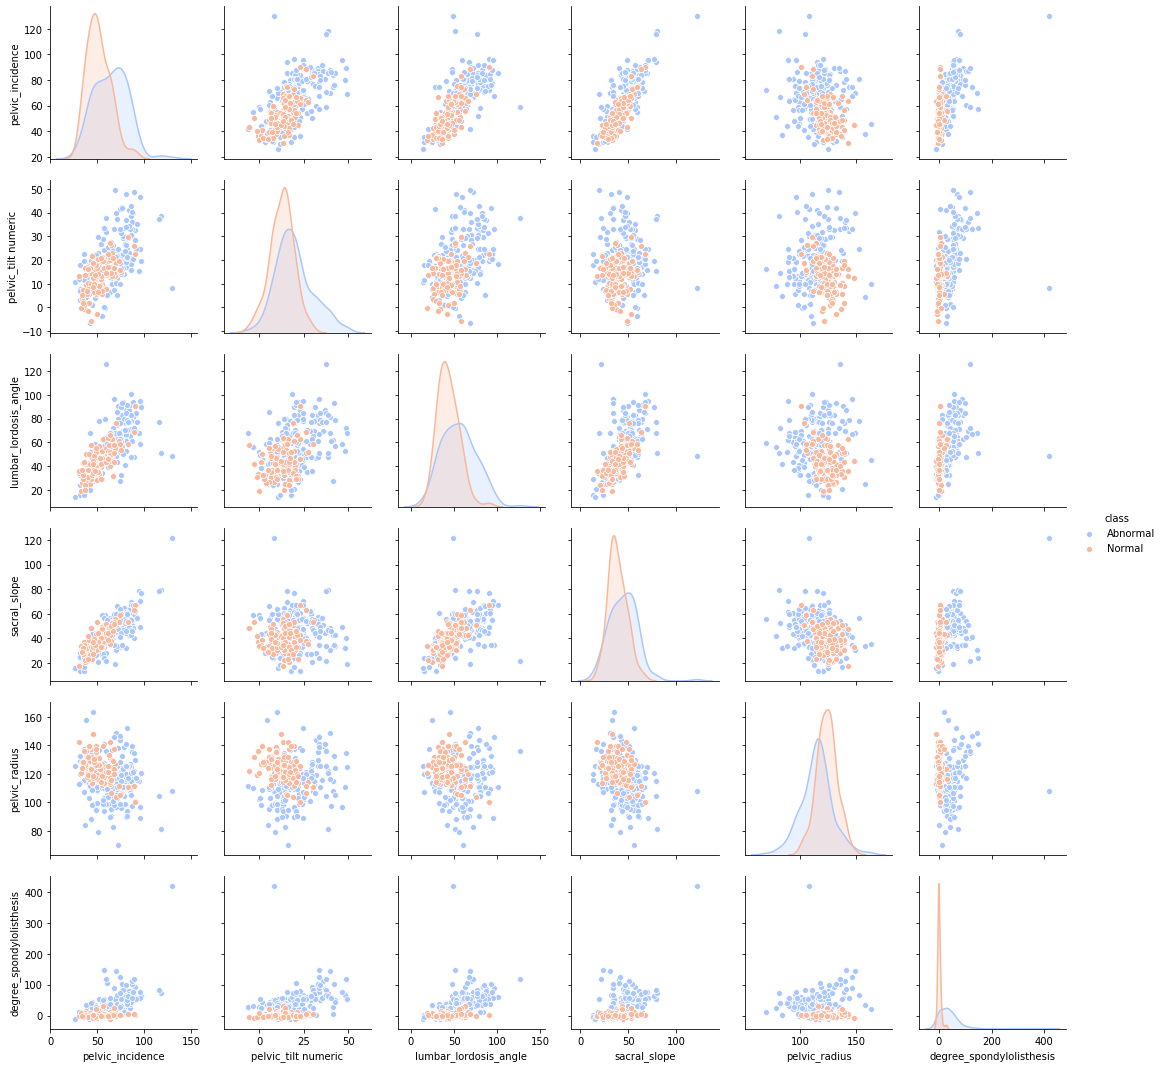

In [31]:
sns.pairplot(df2C_weka, hue='class', palette='coolwarm')

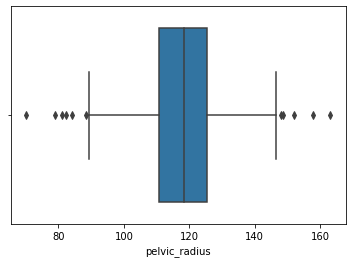

In [34]:
sns.boxplot(x=df2C_weka["pelvic_radius"])

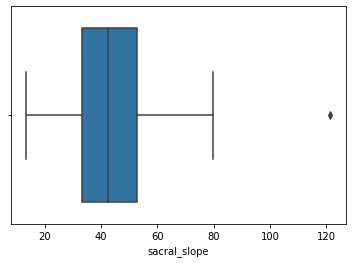

In [38]:
sns.boxplot(x=df2C_weka["sacral_slope"])

# Encode the Class variable to integer. (2 marks)

In [134]:
pd.get_dummies(df2C_weka, columns=["class"]).head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data. (2 marks)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [112]:
x = df2C_weka.drop("class", axis=1)
y = df2C_weka["class"]

# Normalize your Data (X) to get values between 0 to 1. (2 marks)

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X)
X_std= scaler.transform(X)
X_std

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30. (2 marks)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Build the KNN model using Train Dataset and predict the class on test dataset. (2 marks)

In [116]:
NNH = KNeighborsClassifier()


In [117]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [118]:
predicted_labels = NNH.predict(X_test)

In [119]:
# Test Confusion matrix
metrics.confusion_matrix(y_train, NNH.predict(X_train))

array([[140,  11],
       [ 14,  52]], dtype=int64)

In [120]:
# Test Confusion matrix
metrics.confusion_matrix(y_test, NNH.predict(X_test))

array([[57,  2],
       [ 9, 25]], dtype=int64)

# Calculate the performance score of of your classification on test dataset. (2 marks)
Hint- You can use knn.score( ) function.

In [121]:
print(("Test accuracy: ", NNH.score(X_test, y_test)))

('Test accuracy: ', 0.8817204301075269)


In [122]:
NNH.score(X_train, y_train) #only to check for train

0.8847926267281107

# What is the best K value for your classifcation?
#Find at which k value you get the best score. (2 marks)

In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
X_train.shape[0]

217

In [125]:
int(np.sqrt(X_train.shape[0]))

14

In [126]:
maxK = int(np.sqrt(X_train.shape[0]))
maxK

14

In [127]:
# creating odd list of K for KNN
myList = list(range(1,15))

In [128]:
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [129]:
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [130]:
# changing to misclassification error
misError = [1 - x for x in cv_scores]

In [131]:
# determining best k
optimal_k = neighbors[misError.index(min(misError))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above. (10 marks)

In [85]:
weka_3= pd.read_csv("3Classdata.csv")

In [86]:
weka_3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [87]:
weka_3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [88]:
weka_3.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [89]:
# Look at the unique values of class values. 

weka_3['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

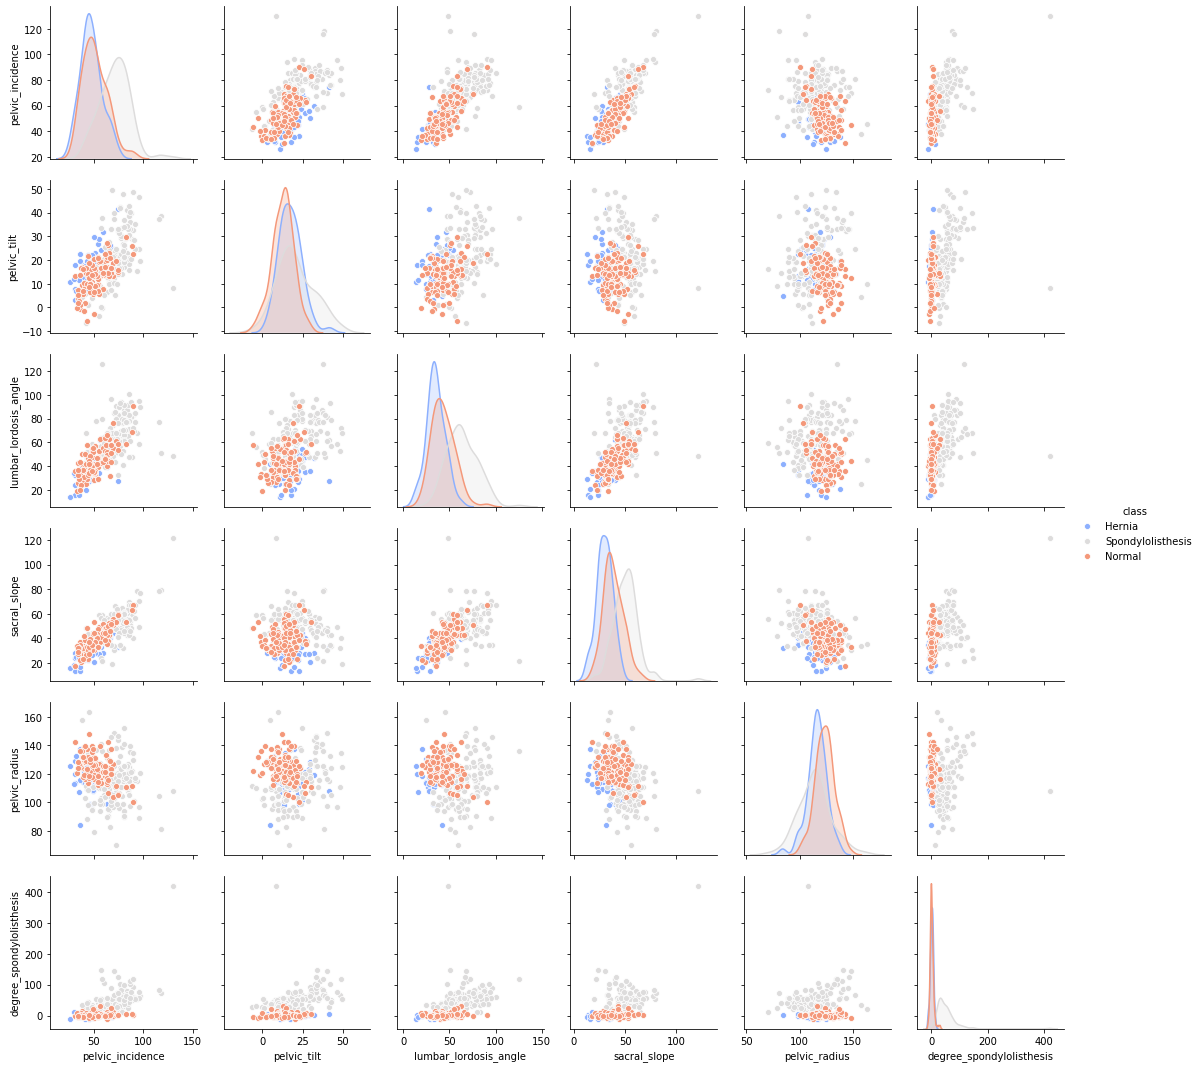

In [90]:
# Look at the distribution of class values and other attributes.
sns.pairplot(weka_3, hue='class', palette='coolwarm')

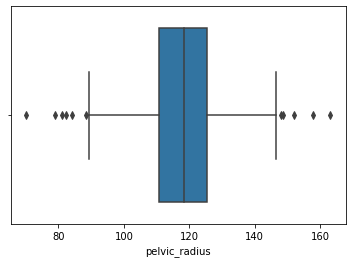

In [91]:
sns.boxplot(x=weka_3["pelvic_radius"])

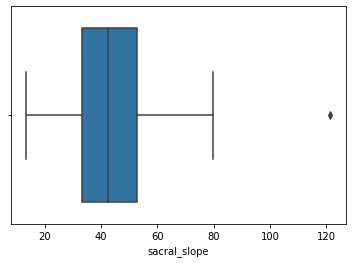

In [92]:
sns.boxplot(x=weka_3["sacral_slope"])

In [135]:
pd.get_dummies(weka_3, columns=["class"]).head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Hernia,class_Normal,class_Spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0,0


In [93]:
weka_3.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [97]:
# Create a separate dataframe consisting only of the features i.e independent attributes
x= weka_3.drop(labels= "class" , axis = 1)
y = weka_3[["class"]]

In [98]:
scaler= MinMaxScaler()
scaler.fit(x)
x_std= scaler.transform(x)
x_std

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [99]:
#Split the data as train and test with a ratio of 70:30. 

test_size = 0.30 # taking 70:30 training and test set
seed = 5  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [100]:
#Build the KNN model using Train Dataset and predict the class on test dataset.


NNH = KNeighborsClassifier()
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

predicted_labels = NNH.predict(X_test)
# Test Confusion matrix
print(metrics.confusion_matrix(y_train, NNH.predict(X_train)))

# Test Confusion matrix
print(metrics.confusion_matrix(y_test, NNH.predict(X_test)))

[[ 33  10   0]
 [  5  59   3]
 [  2   3 102]]
[[ 9  8  0]
 [ 7 26  0]
 [ 0  1 42]]


C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [101]:
#Calculate the performance score of of your classification on test dataset.


print(("Test accuracy: ", NNH.score(X_test, y_test)))

print(NNH.score(X_train, y_train)) #only to check for train

('Test accuracy: ', 0.8279569892473119)
0.8940092165898618


In [104]:
#What is the best K value for your classifcation

X_train.shape[0]

217

In [105]:
int(np.sqrt(X_train.shape[0]))

14

In [106]:
maxK = int(np.sqrt(X_train.shape[0]))
maxK

14

In [107]:

# creating odd list of K for KNN
myList = list(range(1,15))

In [108]:
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [109]:
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\si

In [110]:

# changing to misclassification error
misError = [1 - x for x in cv_scores]

In [111]:


# determining best k
optimal_k = neighbors[misError.index(min(misError))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5
